In [28]:
# Import required libraries
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import os
import hashlib
import shutil
import cv2

# Import numpy for numerical operations
# PIL (Python Imaging Library) for image manipulation
# TensorFlow for machine learning tasks
# pathlib for working with file paths
# os for interacting with the operating system
# hashlib for generating hash values
# shutil for file operations
# cv2 (OpenCV) for computer vision tasks

In [29]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Import matplotlib for visualization
# Import collections for data storage and manipulation
# Import tensorflow and keras for building and training neural networks
# Import various layers and modules from keras for building the model
# Import ImageDataGenerator for data augmentation
# Import image module from keras.preprocessing for image preprocessing

In [30]:
# Specify the directory path where the dataset is located
directory_path = 'Selected/Dataset'

# Use os.walk to traverse the directory structure and get information
# about the subdirectories, files, and sub-subdirectories
path, dirs, files = next(os.walk(directory_path))

# Count the number of subdirectories (directories within the specified directory)
directory_count = len(dirs)

# Print the number of subdirectories (directories within the specified directory)
print('Number of Directories:', directory_count)

Number of Directories: 2


In [32]:
# Specify the directory path where the dataset is located
directory_path = 'Selected/Dataset'

# Use os.walk to traverse the directory structure and retrieve information
path, dirs, files = next(os.walk(directory_path))

# Print the names of the subdirectories within the specified directory
print('Directory names:')
for directory_name in dirs:
    print(directory_name)

Directory names:
george
no_george


In [33]:
# Specify the subdirectory path where the images related to 'george' are located
subdirectory_path = 'Selected/Dataset/george'

# Use os.walk to traverse the subdirectory structure and retrieve information
path, dirs, files = next(os.walk(subdirectory_path))

# Count the number of files (images) in the subdirectory
george_images = len(files)

# Print the number of images with 'St George' in their name within the subdirectory
print('Number of images with St George:', george_images)

Number of images with St George: 2682


In [34]:
# Import required libraries
import hashlib
from collections import defaultdict
import os

# Define a function to calculate the MD5 checksum of a file
def get_file_checksum(filename):
    hasher = hashlib.md5()  # Initialize an MD5 hasher
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):  # Read file in chunks of 4096 bytes
            hasher.update(chunk)  # Update the hasher with each chunk
    return hasher.hexdigest()  # Return the hex digest (checksum)

# Define a function to find duplicate files within a directory
def find_duplicate_files(directory):
    file_hashes = defaultdict(list)  # Create a dictionary to store file hashes and paths
    
    # Traverse the directory structure using os.walk
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)  # Get full path of the file
            file_hash = get_file_checksum(full_path)  # Calculate MD5 hash of the file
            file_hashes[file_hash].append(full_path)  # Store file path with its hash
    
    # Extract groups of duplicate files (more than one path for the same hash)
    duplicate_groups = [files for files in file_hashes.values() if len(files) > 1]
    return duplicate_groups

# Directory path to search for duplicate files
directory_to_search = "Selected/Dataset/george/"
duplicate_groups = find_duplicate_files(directory_to_search)

# Print duplicate file groups
for group in duplicate_groups:
    print("Duplicate files:")
    for file_path in group:
        print(file_path)
    print()

Duplicate files:
Selected/Dataset/george/0018b7f3006c03e479018e609629d226.jpg
Selected/Dataset/george/0018b7f3006c03e479018e609629d226.jpg.1
Selected/Dataset/george/0018b7f3006c03e479018e609629d226.jpg.2

Duplicate files:
Selected/Dataset/george/00e5d366808afde912ec0d6f3905890e.jpg
Selected/Dataset/george/00e5d366808afde912ec0d6f3905890e.jpg.1

Duplicate files:
Selected/Dataset/george/01e4ea11aa55bb0e036912e8c84c478e.jpg
Selected/Dataset/george/01e4ea11aa55bb0e036912e8c84c478e.jpg.1

Duplicate files:
Selected/Dataset/george/02a62272caeadb26d626f3eb55f8802d.jpg
Selected/Dataset/george/02a62272caeadb26d626f3eb55f8802d.jpg.1

Duplicate files:
Selected/Dataset/george/03305116c971789a45dbe6df0c3af115.jpg
Selected/Dataset/george/03305116c971789a45dbe6df0c3af115.jpg.1
Selected/Dataset/george/03305116c971789a45dbe6df0c3af115.jpg.2

Duplicate files:
Selected/Dataset/george/03a3e96b15e8735b097156d7b138cd92.jpg
Selected/Dataset/george/03a3e96b15e8735b097156d7b138cd92.jpg.1

Duplicate files:
Selec

In [35]:
# Import required libraries
import hashlib
from collections import defaultdict
import os

# Define a function to calculate the MD5 checksum of a file
def get_file_checksum(filename):
    hasher = hashlib.md5()  # Initialize an MD5 hasher
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):  # Read file in chunks of 4096 bytes
            hasher.update(chunk)  # Update the hasher with each chunk
    return hasher.hexdigest()  # Return the hex digest (checksum)

# Define a function to remove duplicate files within a directory
def remove_duplicate_files(directory):
    file_hashes = defaultdict(list)  # Create a dictionary to store file hashes and paths
    removed_count = 0  # Initialize a count of removed duplicate files
    
    # Traverse the directory structure using os.walk
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)  # Get full path of the file
            file_hash = get_file_checksum(full_path)  # Calculate MD5 hash of the file
            file_hashes[file_hash].append(full_path)  # Store file path with its hash
    
    # Iterate through file hash groups and remove duplicate files
    for files in file_hashes.values():
        if len(files) > 1:
            # Keep the first file, remove the rest
            files_to_remove = files[1:]
            for file_path in files_to_remove:
                os.remove(file_path)  # Remove the duplicate file
                removed_count += 1  # Increment the removed count
    
    return removed_count  # Return the total number of removed duplicates

# Directory path to clean (remove duplicate files from)
directory_to_clean = "Selected/Dataset/george/"
removed_count = remove_duplicate_files(directory_to_clean)

# Print the count of removed duplicate files
print(f"Removed {removed_count} duplicate files.")

Removed 324 duplicate files.


In [36]:
# Get a list of file names in the specified directory
file_names = os.listdir('Selected/Dataset/george')

# Print the list of file names
print(file_names)

['0018b7f3006c03e479018e609629d226.jpg', '005d75fd1ab5478b0a1b3290032e9358.jpg', '007976c486543ea187dcc285f1564aca.jpg', '009e2661284808d4373a71d2f461ac86.jpg', '00a8418680f015900aa9ee6eea4c762f.jpg', '00c267a9a5895b1b04a58228f37d3116.jpg', '00e5d366808afde912ec0d6f3905890e.jpg', '00f07d4b277a6de64488cb1137347db6.jpg', '01065ddfd068eb0e5358795714c6022f.jpg', '01516a9a358b7196b18236017750faf8.jpg', '0153dbf9d4484a990b1d183825679bc9.jpg', '016cea2ced920d8f05c65b75a988b6dd.jpg', '016e4766a9f6ee3978b6318a592421e0.jpg', '0170c0b56f8e4726aba50cfd7bf22ec1.jpg', '0174ad90fad81e8632464a7403cada1f.jpg', '0187d575c4ab17cc4a72f578ee750944.jpg', '0196052669e65fb569a8415d8db526a0.jpg', '01a351d6d01d9a525a11e75e32942c68.jpg', '01cd39528965c78e119e6629adfa99f0.jpg', '01dcea291ddc7ce0fd04d17c9007198a.jpg', '01e4ea11aa55bb0e036912e8c84c478e.jpg', '01f0caa8e007d558fed12cf033fda57b.jpg', '01fa6f6ee89e05957cb30a23b17db813.jpg', '0205bc42e82109eff8654f5ed3786c58.jpg', '02154f7e75289f8eeb0d055e43f1302d.jpg',

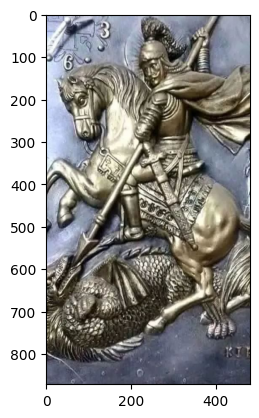

In [37]:
# Import required libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load an image using mpimg.imread
img1 = mpimg.imread('Selected/Dataset/george/005d75fd1ab5478b0a1b3290032e9358.jpg')

# Display the loaded image using plt.imshow
imgplt = plt.imshow(img1)

# Show the image plot
plt.show()

In [38]:
# Specify the subdirectory path where the images without 'St George' are located
subdirectory_path = 'Selected/Dataset/no_george'

# Use os.walk to traverse the subdirectory structure and retrieve information
path, dirs, files = next(os.walk(subdirectory_path))

# Count the number of files (images) in the subdirectory
no_george_images = len(files)

# Print the number of images without 'St George' in their name within the subdirectory
print('Number of images without St George:', no_george_images)

Number of images without St George: 3367


In [39]:
# Import required libraries
import hashlib
from collections import defaultdict
import os

# Define a function to calculate the MD5 checksum of a file
def get_file_checksum(filename):
    hasher = hashlib.md5()  # Initialize an MD5 hasher
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):  # Read file in chunks of 4096 bytes
            hasher.update(chunk)  # Update the hasher with each chunk
    return hasher.hexdigest()  # Return the hex digest (checksum)

# Define a function to find duplicate files within a directory
def find_duplicate_files(directory):
    file_hashes = defaultdict(list)  # Create a dictionary to store file hashes and paths
    
    # Traverse the directory structure using os.walk
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)  # Get full path of the file
            file_hash = get_file_checksum(full_path)  # Calculate MD5 hash of the file
            file_hashes[file_hash].append(full_path)  # Store file path with its hash
    
    # Extract groups of duplicate files (more than one path for the same hash)
    duplicate_groups = [files for files in file_hashes.values() if len(files) > 1]
    return duplicate_groups

# Directory path to search for duplicate files
directory_to_search = "Selected/Dataset/no_george/"
duplicate_groups = find_duplicate_files(directory_to_search)

# Print duplicate file groups
for group in duplicate_groups:
    print("Duplicate files:")
    for file_path in group:
        print(file_path)
    print()

Duplicate files:
Selected/Dataset/no_george/09a51df0d22064b5d2a0e0dc489e2d44.jpg
Selected/Dataset/no_george/09a51df0d22064b5d2a0e0dc489e2d44.jpg.1

Duplicate files:
Selected/Dataset/no_george/0a6d5828d03fdc8b600ba250baee71fa.jpg
Selected/Dataset/no_george/0a6d5828d03fdc8b600ba250baee71fa.jpg.1

Duplicate files:
Selected/Dataset/no_george/1422d1cad8ee7331a569353670abc9a5.jpg
Selected/Dataset/no_george/1422d1cad8ee7331a569353670abc9a5.jpg.1

Duplicate files:
Selected/Dataset/no_george/16bda5cdc7e36ac85274ae212d74b723.jpg
Selected/Dataset/no_george/16bda5cdc7e36ac85274ae212d74b723.jpg.1

Duplicate files:
Selected/Dataset/no_george/17032a39d5ed12d7267093ea4e071ebc.jpg
Selected/Dataset/no_george/17032a39d5ed12d7267093ea4e071ebc.jpg.1

Duplicate files:
Selected/Dataset/no_george/19c0764e56d95eff56ce5c8f9169a0ec.jpg
Selected/Dataset/no_george/19c0764e56d95eff56ce5c8f9169a0ec.jpg.1

Duplicate files:
Selected/Dataset/no_george/2aa844f434d20d60c3e9d2bd8c937e89.jpg
Selected/Dataset/no_george/2aa8

In [40]:
# Import required libraries
import hashlib
from collections import defaultdict
import os

# Define a function to calculate the MD5 checksum of a file
def get_file_checksum(filename):
    hasher = hashlib.md5()  # Initialize an MD5 hasher
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):  # Read file in chunks of 4096 bytes
            hasher.update(chunk)  # Update the hasher with each chunk
    return hasher.hexdigest()  # Return the hex digest (checksum)

# Define a function to remove duplicate files within a directory
def remove_duplicate_files(directory):
    file_hashes = defaultdict(list)  # Create a dictionary to store file hashes and paths
    removed_count = 0  # Initialize a count of removed duplicate files
    
    # Traverse the directory structure using os.walk
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)  # Get full path of the file
            file_hash = get_file_checksum(full_path)  # Calculate MD5 hash of the file
            file_hashes[file_hash].append(full_path)  # Store file path with its hash
    
    # Iterate through file hash groups and remove duplicate files
    for files in file_hashes.values():
        if len(files) > 1:
            # Keep the first file, remove the rest
            files_to_remove = files[1:]
            for file_path in files_to_remove:
                os.remove(file_path)  # Remove the duplicate file
                removed_count += 1  # Increment the removed count
    
    return removed_count  # Return the total number of removed duplicates

# Directory path to clean (remove duplicate files from)
directory_to_clean = "Selected/Dataset/no_george/"
removed_count = remove_duplicate_files(directory_to_clean)

# Print the count of removed duplicate files
print(f"Removed {removed_count} duplicate files.")

Removed 28 duplicate files.


In [41]:
# Import the required library
import os

# Get a list of file names in the specified directory
file_names = os.listdir('Selected/Dataset/no_george/')

# Print the list of file names
print(file_names)

['001057258c93dc3fe176526d011af770.jpg', '001592ee7a76aa8116c99dd35f71b841.jpg', '001f59de2a98736af67bd6736872770f.jpg', '003d4e46a416fd1ccdc9deb20a079865.jpg', '003fd791d02173dc838c4ed68eadc0d9.jpg', '004d166b79d0ba4440927448576a5d38.jpg', '0050e33979e8db7ce559c0693d9b632b.jpg', '0067c05256b4b0c40fef191d867f4fef.jpg', '007d215f8ca4296535bfffc52a085e14.jpg', '008ee0b9f6bca98d16fe8108375e4d78.jpg', '00a16849dbc8281a38f7bfcabca8f99c.jpg', '00bb70f08e19fccddf20b4df40936c2e.jpg', '00de0a9376add24248ade9a0364b771d.jpg', '00e6fc96b14b5b27fb8f61bfb72f6943.jpg', '01073eb7b3ffc55db3efe710588eb2d0.jpg', '010f5d0264b87aefbb71dd000f7063cd.jpg', '0146cdc5cee0dfa8812bdb2a38183649.jpg', '015792479c00b4458a5d16c1347195df.jpg', '015cca4d7c43d34996f6839de045a3b8.jpg', '016bbab604ae78960e28220b06615988.jpg', '0188542e78caff82450548fd49e99dbf.jpg', '01a0785715b064b10ade9be9e32449b5.jpg', '01ac73d2f0de939f71a0cc3acd40107f.jpg', '01b4e3aa073eee26194aae64cd81d4e6.jpg', '01d9784ae7270842f92696374027b328.jpg',

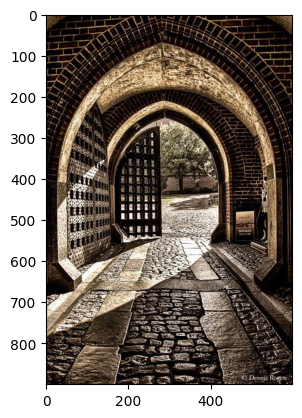

In [42]:
# Import required libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load an image using mpimg.imread
img1 = mpimg.imread('Selected/Dataset/no_george/001592ee7a76aa8116c99dd35f71b841.jpg')

# Display the loaded image using plt.imshow
imgplt = plt.imshow(img1)

# Show the image plot
plt.show()

In [46]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 1000 filenames
image_filenames = image_filenames[:1000]

# Destination folder to transfer images
destination_folder = 'Selected/Train/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Train/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Train/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Train/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Train/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Train/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Train/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Train/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Train/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Train/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Train/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Train/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Train/george/'
Transferred '016e4766a9f6ee3978b6318a592421e0.jpg' t

In [47]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 500 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Validation/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Validation/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Validation/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Validation/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Validation/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Validation/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Validation/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Validation/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Validation/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Validation/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Validation/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Validation/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Validation/g

In [48]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 500 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Test/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Test/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Test/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Test/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Test/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Test/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Test/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Test/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Test/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Test/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Test/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Test/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Test/george/'
Transferred '016e4766a9f6ee3978b6318a592421e0.jpg' to 'Selected/

In [49]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 1000 filenames
image_filenames = image_filenames[:1000]

# Destination folder to transfer images
destination_folder = 'Selected/Train/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Train/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Train/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Train/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Train/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Train/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Train/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Train/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Train/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Train/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Train/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Train/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c2e.jpg' to 'Selected/Train/no_george/'
Transferred '00d

In [50]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 500 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Validation/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Validation/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Validation/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Validation/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Validation/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Validation/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Validation/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Validation/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Validation/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Validation/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Validation/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Validation/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c

In [51]:
# Import required libraries
import os
import shutil

# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 500 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Test/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

# Print a message indicating completion
print("Image transfer completed.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Test/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Test/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Test/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Test/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Test/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Test/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Test/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Test/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Test/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Test/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Test/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c2e.jpg' to 'Selected/Test/no_george/'
Transferred '00de0a9376add24

In [52]:
# Import required libraries
from tensorflow import keras

# Create a train dataset using image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory='Selected/Train/',         # Directory containing train images
    labels='inferred',                   # Infers labels from subdirectory structure
    label_mode='int',                    # Labels are represented as integers
    batch_size=32,                       # Batch size for each iteration
    image_size=(256, 256)                # Resize images to 256x256 pixels
)

# Create a validation dataset using image_dataset_from_directory
validation_ds = keras.utils.image_dataset_from_directory(
    directory='Selected/Validation/',    # Directory containing validation images
    labels='inferred',                   # Infers labels from subdirectory structure
    label_mode='int',                    # Labels are represented as integers
    batch_size=32,                       # Batch size for each iteration
    image_size=(256, 256)                # Resize images to 256x256 pixels
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [53]:
# Import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values between 0 and 1
train_generator = train_datagen.flow_from_directory(
    directory='Selected/Train/',         # Directory containing train images
    target_size=(256, 256),              # Resize images to 256x256 pixels
    batch_size=32,                       # Batch size for each iteration
    class_mode='categorical',            # Assumes categorical labels, change if needed
    shuffle=True                          # Shuffle the data
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values between 0 and 1
validation_generator = validation_datagen.flow_from_directory(
    directory='Selected/Validation/',    # Directory containing validation images
    target_size=(256, 256),              # Resize images to 256x256 pixels
    batch_size=32,                       # Batch size for each iteration
    class_mode='categorical',            # Assumes categorical labels, change if needed
    shuffle=False                         # Do not shuffle the data
)

# Print some information about the loaded datasets
print("Training dataset:")
print("Number of samples:", train_generator.samples)          # Total number of samples
print("Number of classes:", train_generator.num_classes)       # Total number of classes
print("Class labels:", train_generator.class_indices)          # Dictionary mapping class names to class indices
print()

print("Validation dataset:")
print("Number of samples:", validation_generator.samples)     # Total number of samples
print("Number of classes:", validation_generator.num_classes)  # Total number of classes
print("Class labels:", validation_generator.class_indices)     # Dictionary mapping class names to class indices
print()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training dataset:
Number of samples: 2000
Number of classes: 2
Class labels: {'george': 0, 'no_george': 1}

Validation dataset:
Number of samples: 1000
Number of classes: 2
Class labels: {'george': 0, 'no_george': 1}



In [55]:
# Import required library
import tensorflow as tf

# Define a function to preprocess and normalize the images
def process(image, label):
    image = tf.cast(image / 256., tf.float32)  # Normalize pixel values between 0 and 1
    return image, label

# Apply the process function to the train and validation datasets
train_ds = train_ds.map(process)             # Apply to the training dataset
validation_ds = validation_ds.map(process)   # Apply to the validation dataset

In [56]:
# Import required libraries
from keras import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a Convolutional layer with 32 filters, 3x3 kernel, 'valid' padding, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))

# Add Batch Normalization layer to normalize activations
model.add(BatchNormalization())

# Add MaxPooling layer with 2x2 pool size and 2x2 strides
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Add another Convolutional layer with 64 filters, 3x3 kernel, 'valid' padding, and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))

# Add Batch Normalization layer
model.add(BatchNormalization())

# Add another MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Add another Convolutional layer with 128 filters, 3x3 kernel, 'valid' padding, and ReLU activation
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))

# Add Batch Normalization layer
model.add(BatchNormalization())

# Add another MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the output from the previous layers
model.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add Dropout layer with 0.1 dropout rate
model.add(Dropout(0.1))

# Add another Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add another Dropout layer
model.add(Dropout(0.1))

# Add the output Dense layer with 1 unit and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

In [57]:
# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [60]:
# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',                      # Optimizer algorithm (Adam)
    loss='binary_crossentropy',            # Loss function for binary classification
    metrics=['accuracy']                   # List of metrics to monitor during training
)

# The model is now ready for training
# It will be optimized using the Adam optimizer, aiming to minimize binary cross-entropy loss
# Training progress will be monitored using the 'accuracy' metric

In [61]:
# Train the model using the provided training and validation datasets
history = model.fit(
    train_ds,                            # Training dataset
    epochs=10,                           # Number of training epochs
    validation_data=validation_ds        # Validation dataset for monitoring performance
)

# The model.fit() function starts the training process
# The model is trained for a specified number of epochs (10 in this case)
# During each epoch, the model adjusts its weights to minimize the defined loss function
# Validation data is used to assess the model's performance on unseen data
# The training progress and evaluation metrics are stored in the 'history' object

Epoch 1/10
63/63 [==============================] - 250s 4s/step - loss: 4.8513 - accuracy: 0.5840 - val_loss: 1.6495 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 293s 5s/step - loss: 2.6872 - accuracy: 0.5895 - val_loss: 12.4195 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 301s 5s/step - loss: 1.5513 - accuracy: 0.5770 - val_loss: 27.9453 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 302s 5s/step - loss: 1.0643 - accuracy: 0.5630 - val_loss: 43.5137 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 450s 7s/step - loss: 0.8055 - accuracy: 0.5965 - val_loss: 45.2817 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 424s 7s/step - loss: 0.6278 - accuracy: 0.6325 - val_loss: 40.8480 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 367s 6s/step - loss: 0.6297 - accuracy: 0.6680 - val_loss: 6.5726 - val_accuracy: 0.4980
Epoch 8/

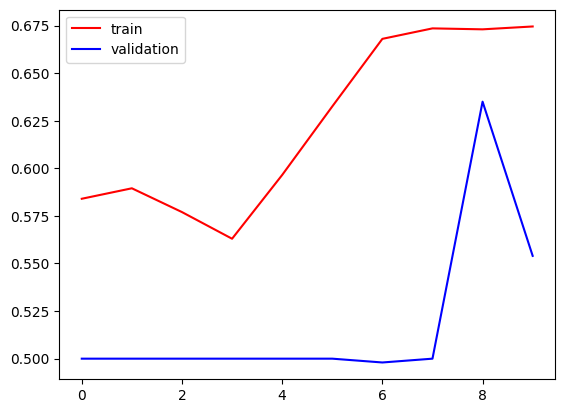

In [62]:
# Import the required library
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], color='red', label='train')  # Training accuracy
plt.plot(history.history['val_accuracy'], color='blue', label='validation')  # Validation accuracy

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()

# This code uses matplotlib to visualize the training and validation accuracy
# The red line represents the training accuracy, and the blue line represents the validation accuracy
# The legend helps differentiate between the two lines
# The plot provides insights into how the model's accuracy changes over training epochs

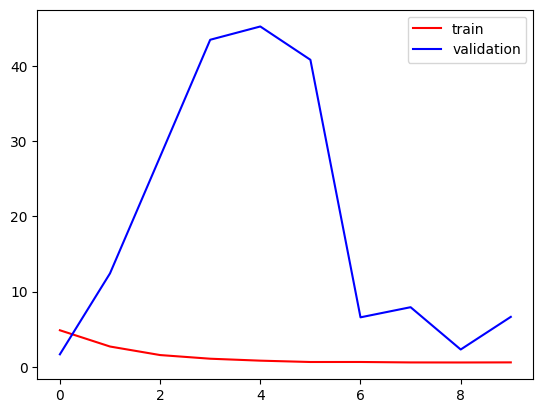

In [63]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], color='red', label='train')  # Training loss
plt.plot(history.history['val_loss'], color='blue', label='validation')  # Validation loss

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()

# This code uses matplotlib to visualize the training and validation loss
# The red line represents the training loss, and the blue line represents the validation loss
# The legend helps differentiate between the two lines
# The plot provides insights into how the model's loss changes over training epochs

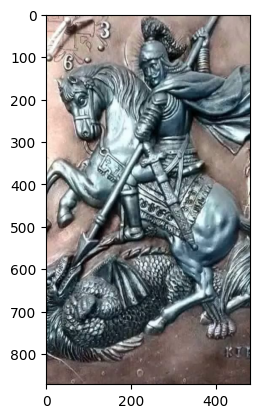

In [64]:
# Define the path to the test image
img_path = 'Selected/Test/george/005d75fd1ab5478b0a1b3290032e9358.jpg'

# Read the test image using OpenCV
test_img = cv2.imread(img_path)

# Display the test image using matplotlib
plt.imshow(test_img)

# This code reads a test image using OpenCV and displays it using matplotlib
# The image will be displayed as is, without normalization

In [65]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the path to the test image
img_path = 'Selected/Test/george/005d75fd1ab5478b0a1b3290032e9358.jpg'

# Load and preprocess the test image
img = image.load_img(img_path, target_size=(256, 256, 3))  # Load the image and resize to target size
img_array = image.img_to_array(img)  # Convert image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
img_array /= 255.0  # Normalize pixel values

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Check the prediction and provide a result
if prediction[0][0] > 0.5:
    print("St. George is present in the image.")
else:
    print("St. George is not present in the image.")

1/1 [==============================] - 0s 271ms/step
St. George is present in the image.
